In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Semester 3/Matkul Machine Learning/Praktikum/5/Data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop("Id", axis=1)

In [5]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
feature_names = X.columns.tolist()

print(f"Fitur (X): {feature_names}")
print(f"Target (y): {list(class_names)}")

Fitur (X): ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target (y): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)
print(f"Jumlah data training: {len(X_train)} (80%)")
print(f"Jumlah data testing:  {len(X_test)} (20%)")

Jumlah data training: 120 (80%)
Jumlah data testing:  30 (20%)


In [8]:
model_awal = DecisionTreeClassifier(random_state=42)

In [9]:
model_awal.fit(X_train, y_train)
print("Model Awal berhasil dilatih.")

Model Awal berhasil dilatih.



1. Akurasi Model Awal: 93.33%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



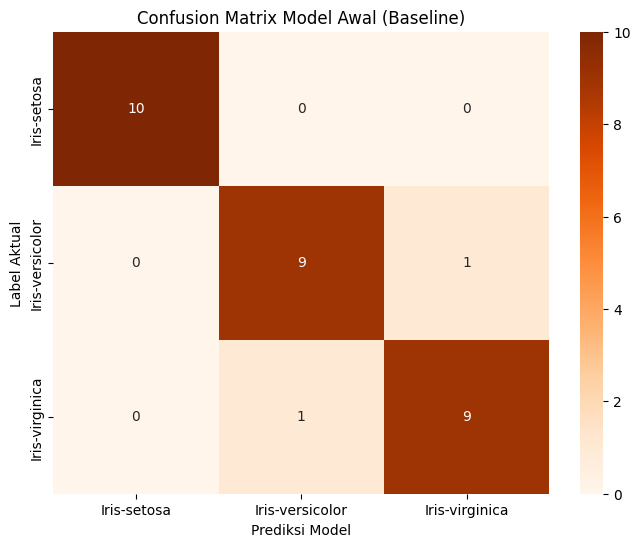

In [10]:
y_pred_awal = model_awal.predict(X_test)

accuracy_awal = accuracy_score(y_test, y_pred_awal)
print(f"\n1. Akurasi Model Awal: {accuracy_awal * 100:.2f}%")

print(classification_report(y_test, y_pred_awal, target_names=class_names))

cm_awal = confusion_matrix(y_test, y_pred_awal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_awal, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi Model')
plt.ylabel('Label Aktual')
plt.title('Confusion Matrix Model Awal (Baseline)')
plt.show()

In [11]:
importance_awal = pd.Series(model_awal.feature_importances_, index=feature_names)
importance_sorted_awal = importance_awal.sort_values(ascending=False)
print(importance_sorted_awal)
print("-" * 60)

PetalLengthCm    0.558568
PetalWidthCm     0.406015
SepalWidthCm     0.029167
SepalLengthCm    0.006250
dtype: float64
------------------------------------------------------------


In [13]:
scores = {}
depth_range = range(1, 9)

for d in depth_range:
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

print("Hasil akurasi untuk setiap max_depth:")
print(pd.Series(scores))

Hasil akurasi untuk setiap max_depth:
1    0.666667
2    0.933333
3    0.966667
4    0.933333
5    0.933333
6    0.933333
7    0.933333
8    0.933333
dtype: float64


In [14]:
best_d = max(scores, key=scores.get)
print(f"\n==> Best max_depth ditemukan: {best_d} (Akurasi: {scores[best_d] * 100:.2f}%)")
print("-" * 60)


==> Best max_depth ditemukan: 3 (Akurasi: 96.67%)
------------------------------------------------------------


In [15]:
model_final = DecisionTreeClassifier(max_depth=best_d, random_state=42)
model_final.fit(X_train, y_train)
print("Model Final berhasil dilatih.")

Model Final berhasil dilatih.


In [18]:
y_pred_final = model_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

print(f"\n Akurasi Model Final: {accuracy_final * 100:.2f}%")
print(classification_report(y_test, y_pred_final, target_names=class_names))


 Akurasi Model Final: 96.67%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



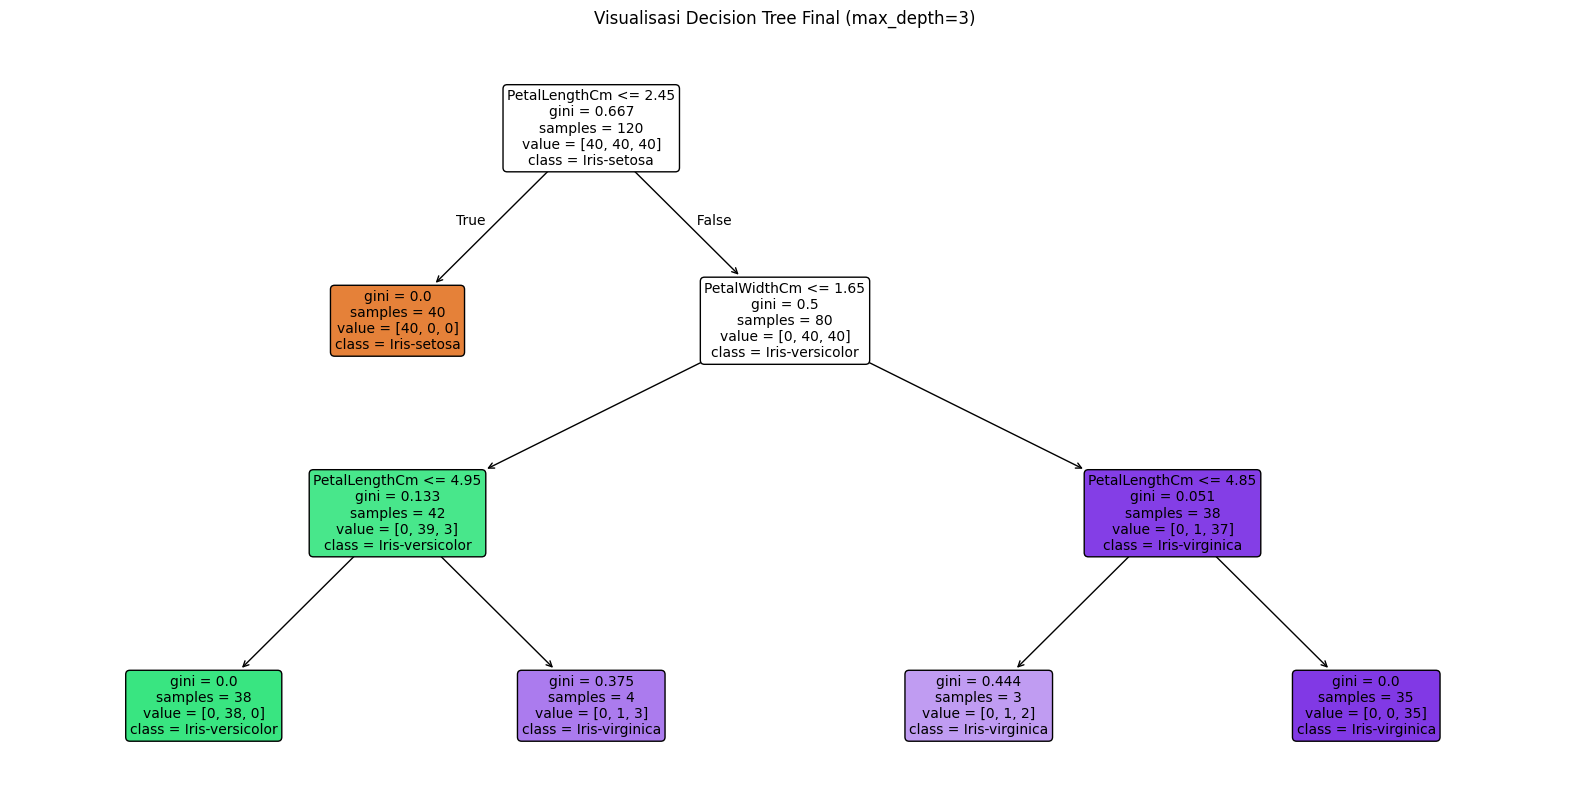

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(
    model_final,
    filled=True,
    rounded=True,
    class_names=class_names,
    feature_names=feature_names,
    fontsize=10
)
plt.title(f"Visualisasi Decision Tree Final (max_depth={best_d})")
plt.show()